# Data Science with Cars
This is a group project within the course Data Science at DHBW Stuttgart on data of cars. The group members are Felix Waldbach and Niklas Wolf.

The observed dataset "Auto-Mpg Data" was taken from the StatLib library which ismaintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

**Tasks**:

Part 1
* Analyze given data with stasticial standard functions
* **Diagrams** for visualization of correlation of the data, **Comment** to highlight interesting correlation

Part 2
* **Prediction** of horsepower with a given dataset without horsepower with **two different approaches**

Part 3
* **Classification** of a vehicle with a certain number of cylinders with the other data  with **two classification methods**

Regarding Part 2 and 3
* Validation and Testing of the Results with evaluation methods
* Compare results and describe end result
* Choose one approach 
* Optimize in maximum 3 iterations and comment on additional optimizations
* Metho for inserting data and giving the result optically and logically

### Reading the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
colnames = ['mpg','cylinders','displacement','horsepower','weight','acceleration','modelyear','origin','carname']
# given data is separated by either 2 or more spaces or tabs, hence this separator
df = pd.read_csv('auto-mpg.data-original',sep='\t+|\s\s+', header=None, engine='python',names=colnames)

### Analyzing the raw data

#### MIssing values

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
modelyear       406 non-null float64
origin          406 non-null float64
carname         406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,"""chevrolet chevelle malibu"""
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,"""buick skylark 320"""
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,"""plymouth satellite"""
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,"""amc rebel sst"""
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,"""ford torino"""


From this first peak we can already see that there are missing values within the data. The value mpg is missing 8 times and the value horsepower is missing 6 times.

#### Some Visualizations

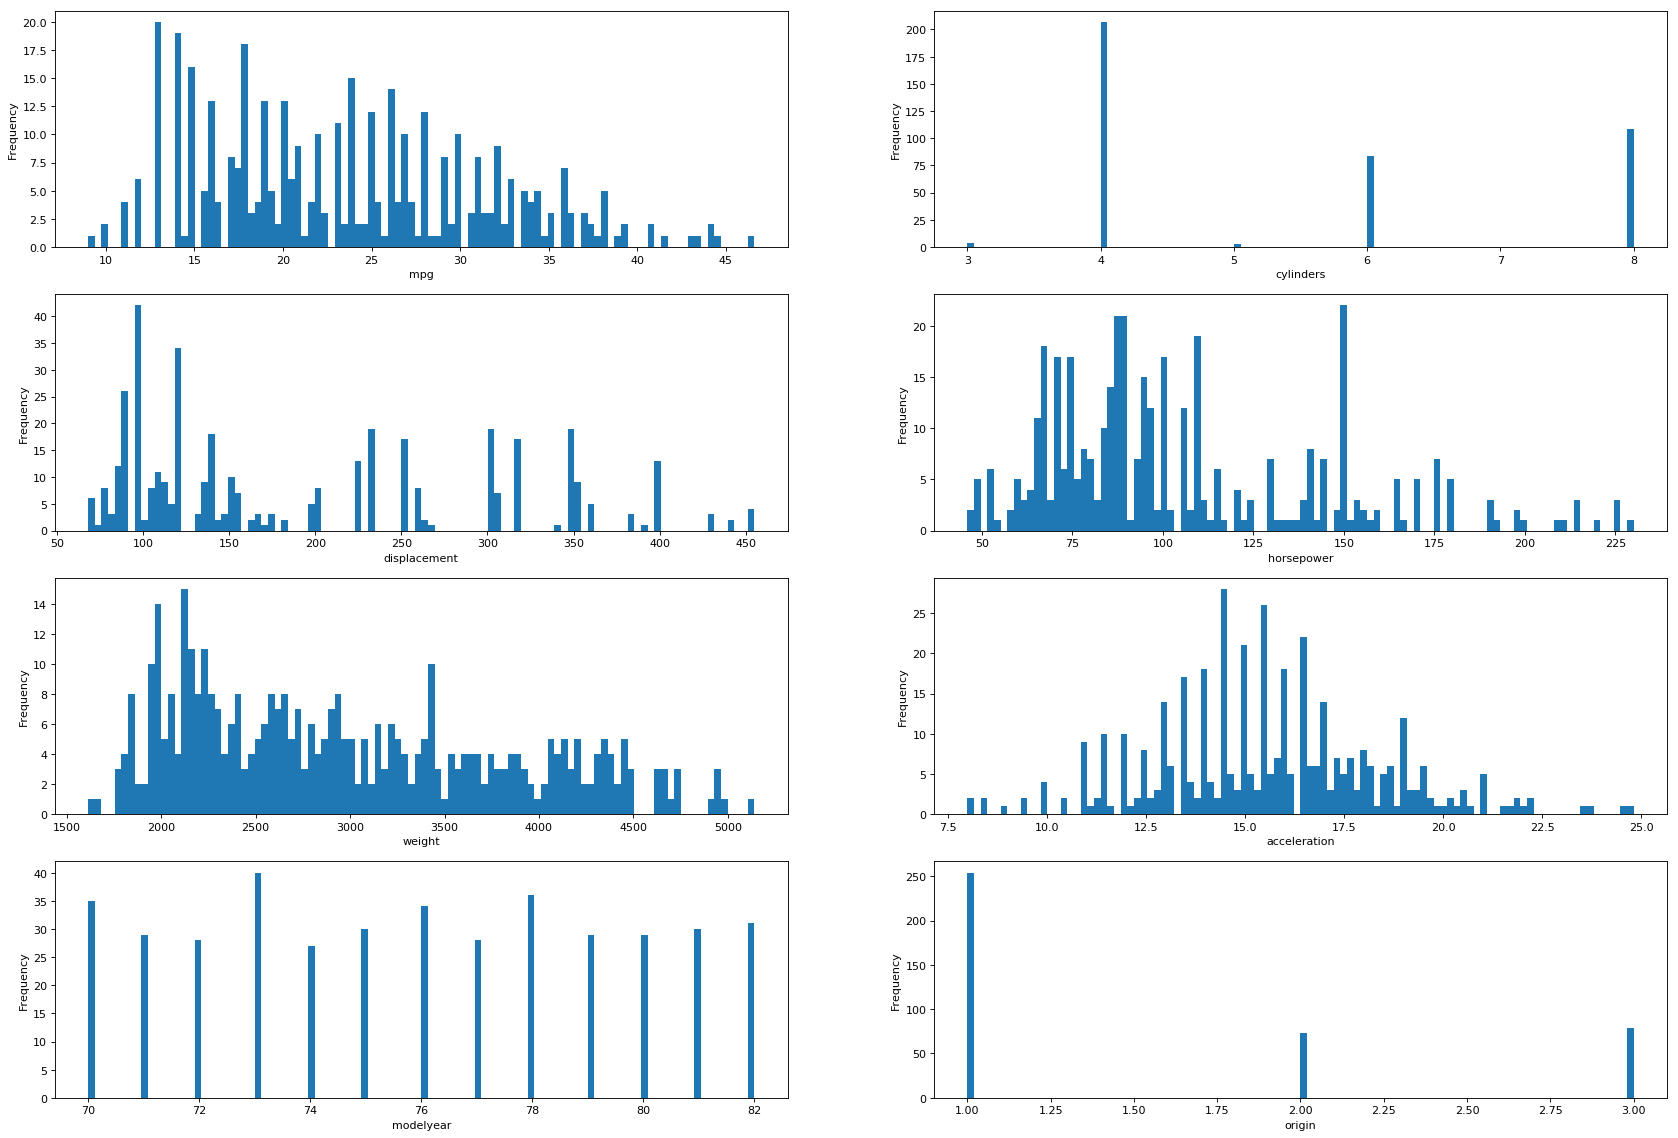

In [70]:
# adjusting jupyter plot size
fig=plt.figure(figsize=(26, 18), dpi= 80, facecolor='w', edgecolor='k')

# plot some of the interesting 
plt.subplot(4, 2, 1)
df['mpg'].plot(kind='hist', bins=100)
plt.xlabel('mpg')

plt.subplot(4, 2, 2)
df['cylinders'].plot(kind='hist', bins=100)
plt.xlabel('cylinders')

plt.subplot(4, 2, 3)
df['displacement'].plot(kind='hist', bins=100)
plt.xlabel('displacement')

plt.subplot(4, 2, 4)
df['horsepower'].plot(kind='hist', bins=100)
plt.xlabel('horsepower')

plt.subplot(4, 2, 5)
df['weight'].plot(kind='hist', bins=100)
plt.xlabel('weight')

plt.subplot(4, 2, 6)
df['acceleration'].plot(kind='hist', bins=100)
plt.xlabel('acceleration')

plt.subplot(4, 2, 7)
df['modelyear'].plot(kind='hist', bins=100)
plt.xlabel('modelyear')

plt.subplot(4, 2, 8)
df['origin'].plot(kind='hist', bins=100)
plt.xlabel('origin')
plt.show()

In both horsepower and acceleration there seem to exist common values that occur more frequently. Cylinder values are with few exceptions mostly within the subset of {4,6,8}.

#### Description of the Dataset

In [47]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### Standard Deviation Coefficient

In [56]:
print("Standard Deviation Coefficient for mpg: {}".format(df.describe()['mpg']['std'] / df.describe()['mpg']['mean']))
print("Standard Deviation Coefficient for cylinders: {}".format(df.describe()['cylinders']['std'] / df.describe()['cylinders']['mean']))
print("Standard Deviation Coefficient for displacement: {}".format(df.describe()['displacement']['std'] / df.describe()['displacement']['mean']))
print("Standard Deviation Coefficient for horsepower: {}".format(df.describe()['horsepower']['std'] / df.describe()['horsepower']['mean']))
print("Standard Deviation Coefficient for weight: {}".format(df.describe()['weight']['std'] / df.describe()['weight']['mean']))
print("Standard Deviation Coefficient for acceleration: {}".format(df.describe()['acceleration']['std'] / df.describe()['acceleration']['mean']))
print("Standard Deviation Coefficient for modelyear: {}".format(df.describe()['modelyear']['std'] / df.describe()['modelyear']['mean']))
print("Standard Deviation Coefficient for origin: {}".format(df.describe()['origin']['std'] / df.describe()['origin']['mean']))

Standard Deviation Coefficient for mpg: 0.3323889554645019
Standard Deviation Coefficient for cylinders: 0.31270211894228644
Standard Deviation Coefficient for displacement: 0.5386728473147292
Standard Deviation Coefficient for horsepower: 0.3689365896615061
Standard Deviation Coefficient for weight: 0.28428556322050363
Standard Deviation Coefficient for acceleration: 0.1806322297151364
Standard Deviation Coefficient for modelyear: 0.04937669874951624
Standard Deviation Coefficient for origin: 0.5082833182507628


As you can see from the above data, most of the dimensions deviate around the same value of 30%. However, the origin and displacement deviate with around 50%. The origin probably deviates that high because it only has the values 1.,2.,3. As you can see on the figure above, most of the values are 1.0.
Also, most of the displacement numbers are rather lower than higher, but they have a big span length.

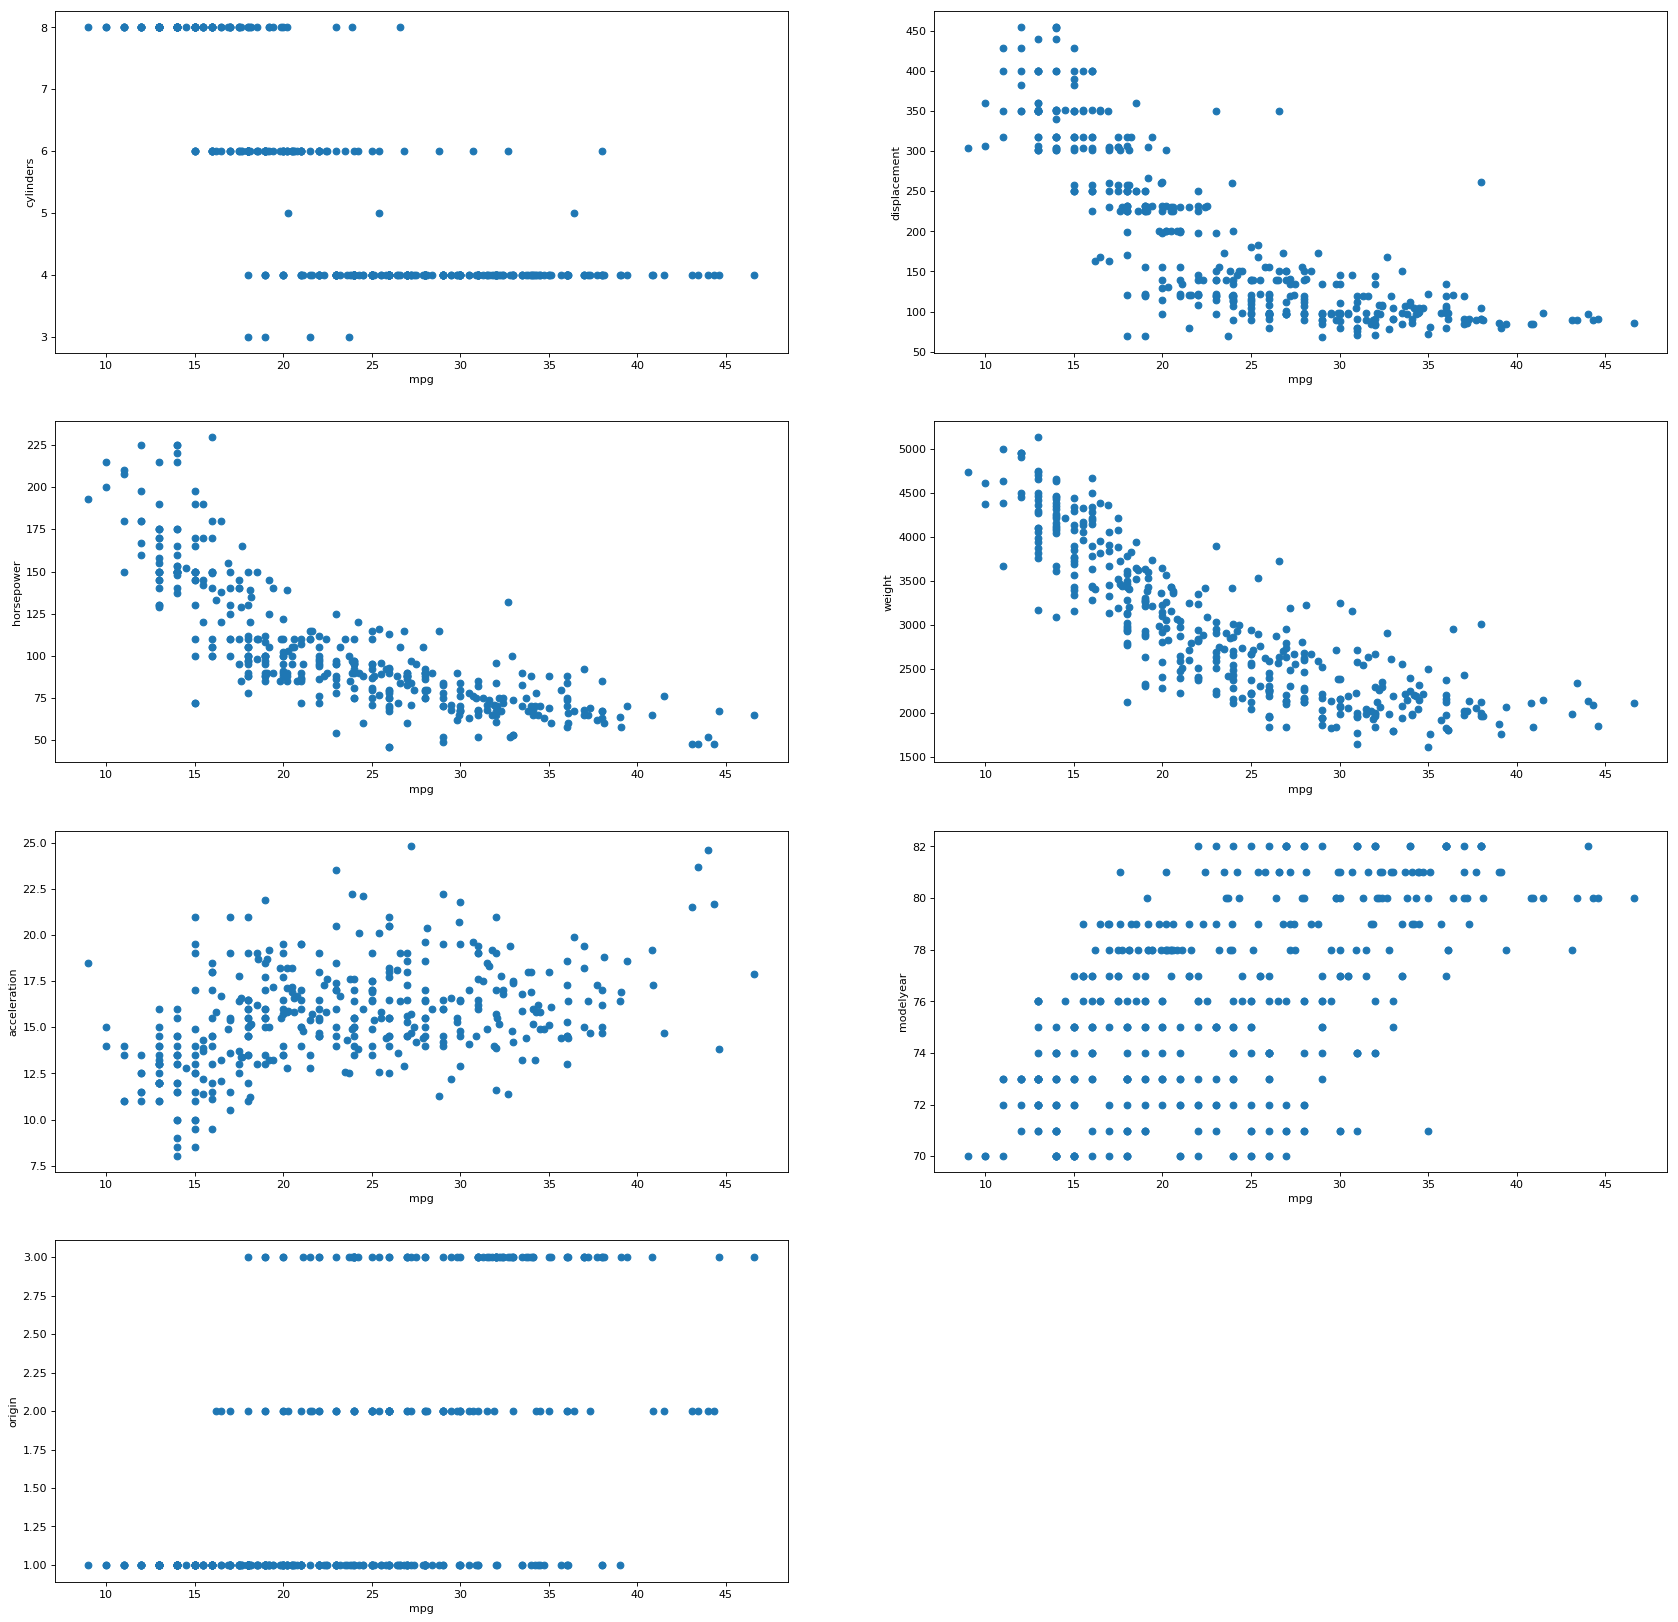

In [87]:
fig = plt.figure(figsize=(26, 26), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(421)
plt.scatter(df['mpg'], df['cylinders'])
plt.xlabel('mpg')
plt.ylabel('cylinders')

plt.subplot(422)
plt.scatter(df['mpg'], df['displacement'])
plt.xlabel('mpg')
plt.ylabel('displacement')

plt.subplot(423)
plt.scatter(df['mpg'], df['horsepower'])
plt.xlabel('mpg')
plt.ylabel('horsepower')

plt.subplot(424)
plt.scatter(df['mpg'], df['weight'])
plt.xlabel('mpg')
plt.ylabel('weight')

plt.subplot(425)
plt.scatter(df['mpg'], df['acceleration'])
plt.xlabel('mpg')
plt.ylabel('acceleration')

plt.subplot(426)
plt.scatter(df['mpg'], df['modelyear'])
plt.xlabel('mpg')
plt.ylabel('modelyear')

plt.subplot(427)
plt.scatter(df['mpg'], df['origin'])
plt.xlabel('mpg')
plt.ylabel('origin')

plt.show()

From the above figures you can tell the dependencies the miles per gallon values from the other values.

Plot 1 indicates that a lower amount of cylinders tends to lead to higher amount of miles per gallon.

Plot 2 indicates that a higher amount of displacements done by a car lead to a lower amount of miles per gallon.

Plot 3 indicates that the same goes for horsepower.

Plot 4 indicates that the same goes for weight

Plot 5 indicates that it is rather hard to tell the mpg by acceleration. There are some extreme values in the dataset, the most values however are not very meaningful.

Plot 6 shows that newer models have a tendency to have a higher mpg value

Plot 7 shows that most values are centered and origins have around the same mpg value with a tendency to have extremes to lower mpg with lower origin value and higher mpg with higher origin value

### Data Preparation

### Regression

### Classification